Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')
국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64
350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
----------------------------------------
98481.1
----------------------------------------


C:\Users\KH302\AppData\Local\Temp\ipykernel_5292\2982462003.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = format(y[idx], ',') + '건'
C:\Users\KH302\AppData\Local\Temp\ipykernel_5292\2982462003.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratioval = '%.1f%%' % (ratio[idx])
C:\Users\KH302\AppData\Local\Temp\ipykernel_5292\2982462003.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=idx, y=y[idx] + 1

barChartPractice_01.png파일이 저장되었습니다.


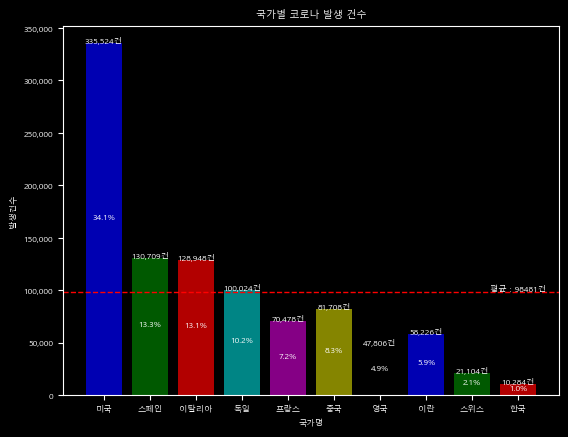

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='Malgun Gothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = "barChartPractice"
filename = './../data/주요발생국가주간동향(4월2째주).csv'

data = pd.read_csv(filename, index_col='국가')
print(data.columns)

chartdata = data['4월06일']
print(chartdata)

#plt.bar() 메소드 정의
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure()
    plt.bar(x, y, color=color, alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #plt.grid(True)

    YTICKS_INTERVAL = 50000
    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)
    print('-' * 40)

    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건'
        ratioval = '%.1f%%' % (ratio[idx])
        #그래프의 위에 건수 표시
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')
        plt.text(x=idx, y=y[idx] / 2, s=ratioval, horizontalalignment='center')

    #평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)
    print('-' * 40)

    average = '평균 : %d건' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size-1, y=meanval + 200, s=average, horizontalalignment='center')

    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + '.png'
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
mycolor = colors[0:len(chartdata)]

MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='국가명', ylabel='발생건수', title='국가별 코로나 발생 건수')